# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [123]:
a = np.array([1, 3, 2, 4])

In [124]:
a

array([1, 3, 2, 4])

In [125]:
type(a)

numpy.ndarray

In [126]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [127]:
A[0]

array([3, 1, 2])

In [128]:
C[2, 0]

4

In [129]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [130]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [131]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [132]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [133]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [134]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [135]:
# A + B

In [136]:
# A * B

### Dot product

In [137]:
A.shape

(2, 3)

In [138]:
B.shape

(3, 2)

In [139]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [140]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [141]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [142]:
C.shape

(6, 2)

In [143]:
A.shape

(2, 3)

In [144]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [145]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [2]:
df = pd.read_csv('../data/banknotes.csv')

In [3]:
df.head()

variace  skewness  curtosis  entropy  class
0  3.62160    8.6661   -2.8073 -0.44699      0
1  4.54590    8.1674   -2.4586 -1.46210      0
2  3.86600   -2.6383    1.9242  0.10645      0
3  3.45660    9.5228   -4.0112 -3.59440      0
4  0.32924   -4.4552    4.5718 -0.98880      0

In [4]:
df['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [5]:
import seaborn as sns

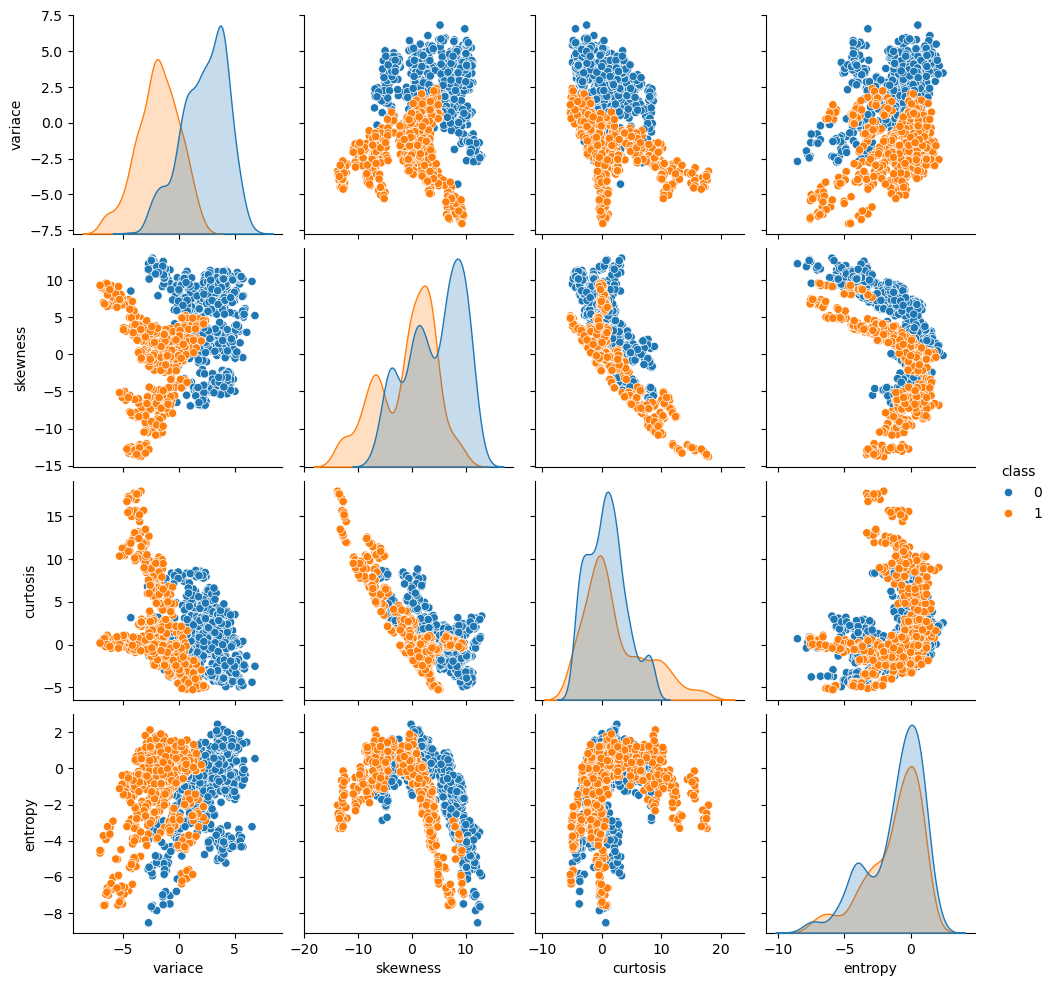

In [6]:
sns.pairplot(df, hue="class");

#### Baseline model

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [8]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [9]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([0.99272727, 0.99636364, 0.99270073, 0.99635036, 0.99635036])

### Logistic Regression Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [12]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test, verbose=0)

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8469 - loss: 0.4159
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.4202 
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8788 - loss: 0.3923 
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3912 
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8776 - loss: 0.3874 
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8946 - loss: 0.3628 
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.3524 
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8903 - loss: 0.3611 
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8875 - loss: 0.3586 
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9065 - loss: 0.3324 


In [13]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [14]:
historydf

accuracy      loss
0  0.852083  0.418640
1  0.867708  0.405062
2  0.873958  0.392867
3  0.878125  0.381924
4  0.889583  0.372000
5  0.894792  0.362916
6  0.900000  0.354604
7  0.902083  0.346920
8  0.904167  0.339778
9  0.904167  0.333131

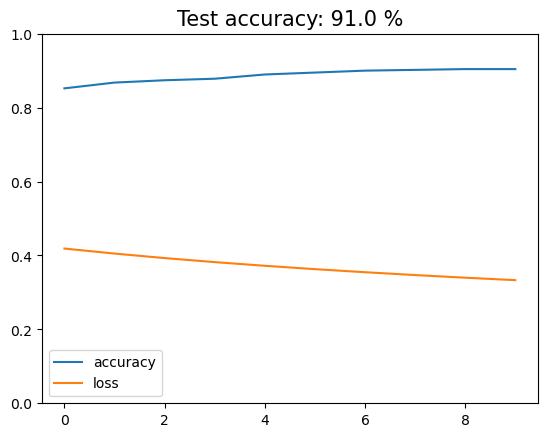

In [15]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15);

### Learning Rates

In [16]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
dflist

[   accuracy      loss
 0  0.685417  0.604798
 1  0.729167  0.542139
 2  0.773958  0.492286
 3  0.802083  0.452484
 4  0.819792  0.420487
 5  0.835417  0.394281
 6  0.844792  0.372619
 7  0.851042  0.354400
 8  0.859375  0.338824
 9  0.867708  0.325395,
    accuracy      loss
 0  0.810417  0.479747
 1  0.922917  0.314879
 2  0.936458  0.266332
 3  0.945833  0.235996
 4  0.952083  0.213707
 5  0.956250  0.196047
 6  0.961458  0.181621
 7  0.962500  0.169638
 8  0.963542  0.159517
 9  0.964583  0.150864,
    accuracy      loss
 0  0.670833  0.564037
 1  0.859375  0.350839
 2  0.922917  0.262977
 3  0.948958  0.212922
 4  0.957292  0.180663
 5  0.963542  0.158647
 6  0.966667  0.142555
 7  0.968750  0.130338
 8  0.968750  0.120752
 9  0.969792  0.113022,
    accuracy      loss
 0  0.915625  0.261026
 1  0.965625  0.126091
 2  0.976042  0.094627
 3  0.977083  0.079941
 4  0.979167  0.070842
 5  0.979167  0.065429
 6  0.980208  0.060737
 7  0.981250  0.057291
 8  0.981250  0.054888
 9  0.98

In [18]:
historydf = pd.concat(dflist, axis=1)

In [19]:
historydf

accuracy      loss  accuracy      loss  accuracy      loss  accuracy  \
0  0.685417  0.604798  0.810417  0.479747  0.670833  0.564037  0.915625   
1  0.729167  0.542139  0.922917  0.314879  0.859375  0.350839  0.965625   
2  0.773958  0.492286  0.936458  0.266332  0.922917  0.262977  0.976042   
3  0.802083  0.452484  0.945833  0.235996  0.948958  0.212922  0.977083   
4  0.819792  0.420487  0.952083  0.213707  0.957292  0.180663  0.979167   
5  0.835417  0.394281  0.956250  0.196047  0.963542  0.158647  0.979167   
6  0.844792  0.372619  0.961458  0.181621  0.966667  0.142555  0.980208   
7  0.851042  0.354400  0.962500  0.169638  0.968750  0.130338  0.981250   
8  0.859375  0.338824  0.963542  0.159517  0.968750  0.120752  0.981250   
9  0.867708  0.325395  0.964583  0.150864  0.969792  0.113022  0.981250   

       loss  
0  0.261026  
1  0.126091  
2  0.094627  
3  0.079941  
4  0.070842  
5  0.065429  
6  0.060737  
7  0.057291  
8  0.054888  
9  0.052572

In [20]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx


In [21]:
idx

MultiIndex([(0.01, 'accuracy'),
            (0.01,     'loss'),
            (0.05, 'accuracy'),
            (0.05,     'loss'),
            ( 0.1, 'accuracy'),
            ( 0.1,     'loss'),
            ( 0.5, 'accuracy'),
            ( 0.5,     'loss')],
           names=['learning_rate', 'metric'])

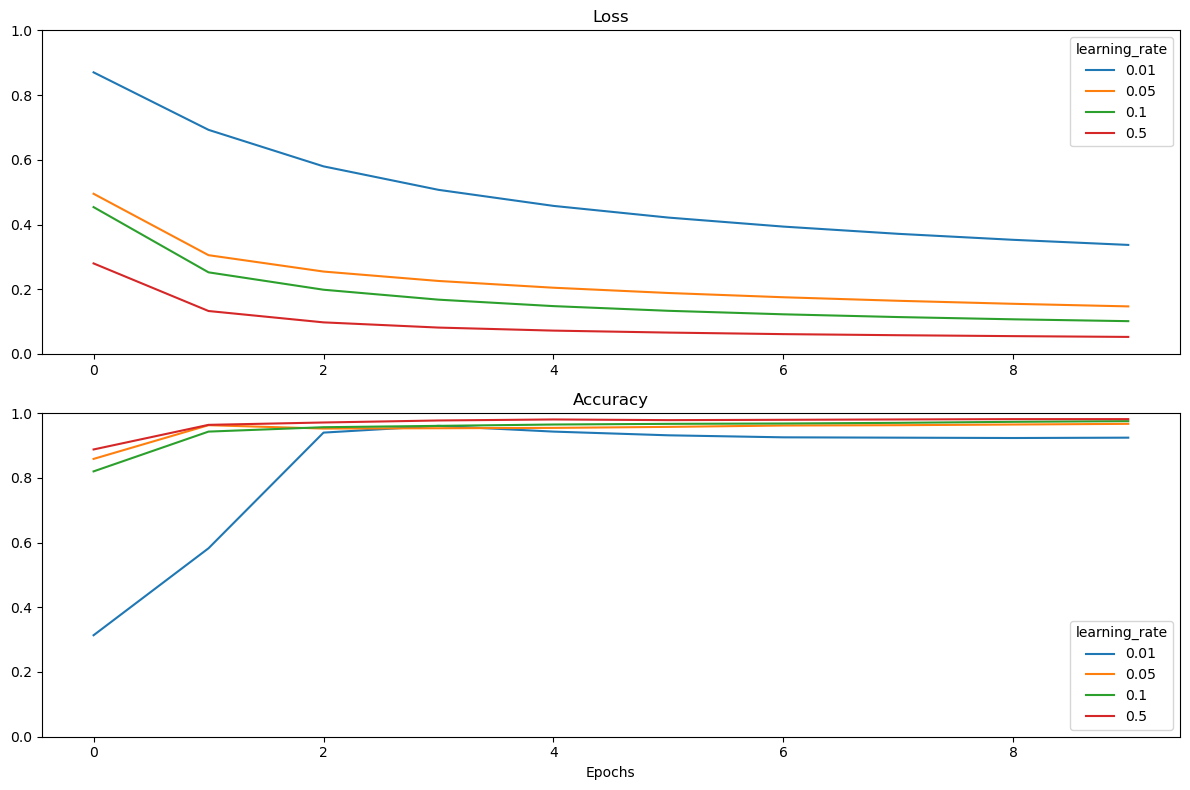

In [22]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [23]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [25]:
historydf

batch_size       16                  32                  64             \
metric      accuracy      loss  accuracy      loss  accuracy      loss   
0           0.494792  0.766599  0.679167  0.606625  0.554167  0.711890   
1           0.558333  0.696364  0.718750  0.574911  0.569792  0.694780   
2           0.596875  0.640808  0.752083  0.547337  0.591667  0.678927   
3           0.623958  0.595467  0.778125  0.523228  0.613542  0.664135   
4           0.660417  0.557509  0.792708  0.501995  0.625000  0.650334   
5           0.702083  0.525047  0.805208  0.483252  0.636458  0.637399   
6           0.739583  0.496882  0.821875  0.466595  0.642708  0.625275   
7           0.766667  0.472035  0.835417  0.451622  0.646875  0.613820   
8           0.785417  0.449877  0.836458  0.438113  0.653125  0.602982   
9           0.804167  0.429920  0.850000  0.425889  0.664583  0.592741   

batch_size       128            
metric      accuracy      loss  
0           0.939583  0.392986  
1           0.939583  0.388736  
2           0.939583  0.384655  
3           0.937500  0.380754  
4           0.937500  0.376972  
5           0.936458  0.373350  
6           0.937500  0.369835  
7           0.937500  0.366481  
8           0.937500  0.363218  
9           0.936458  0.360060

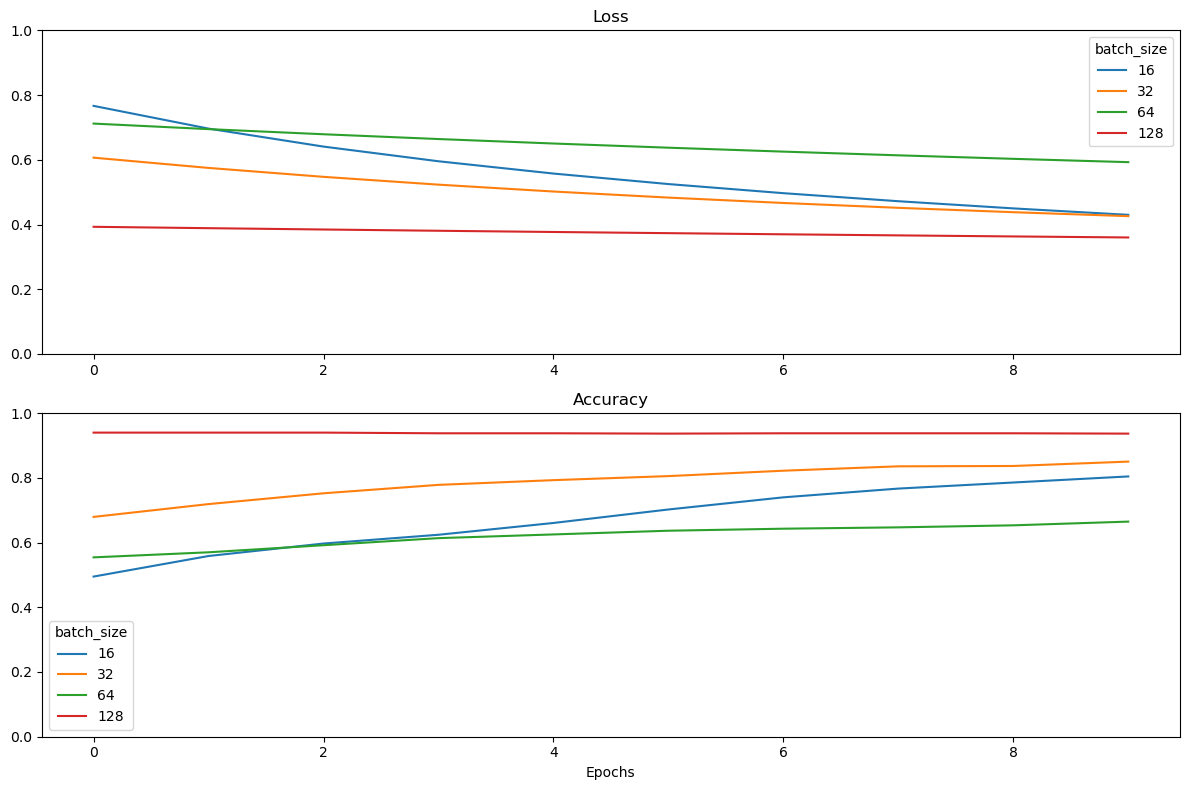

In [26]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [27]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [28]:
dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

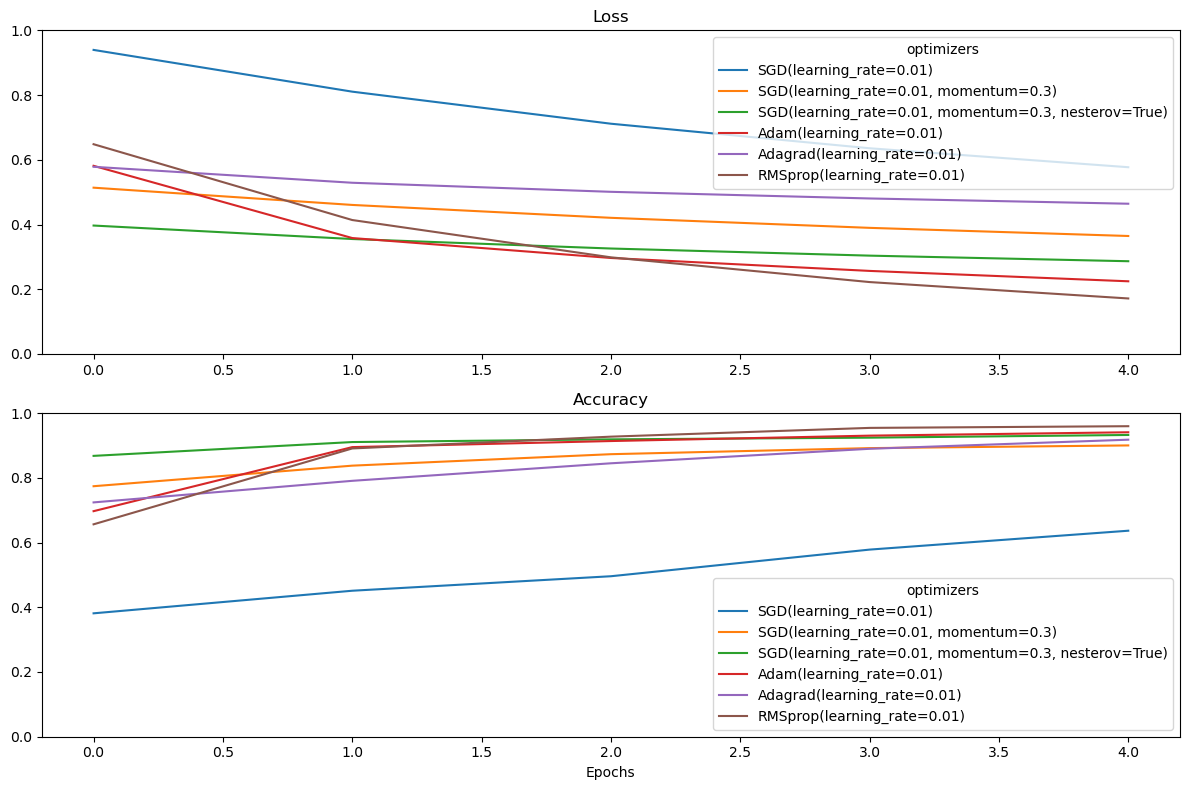

In [30]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [32]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [33]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

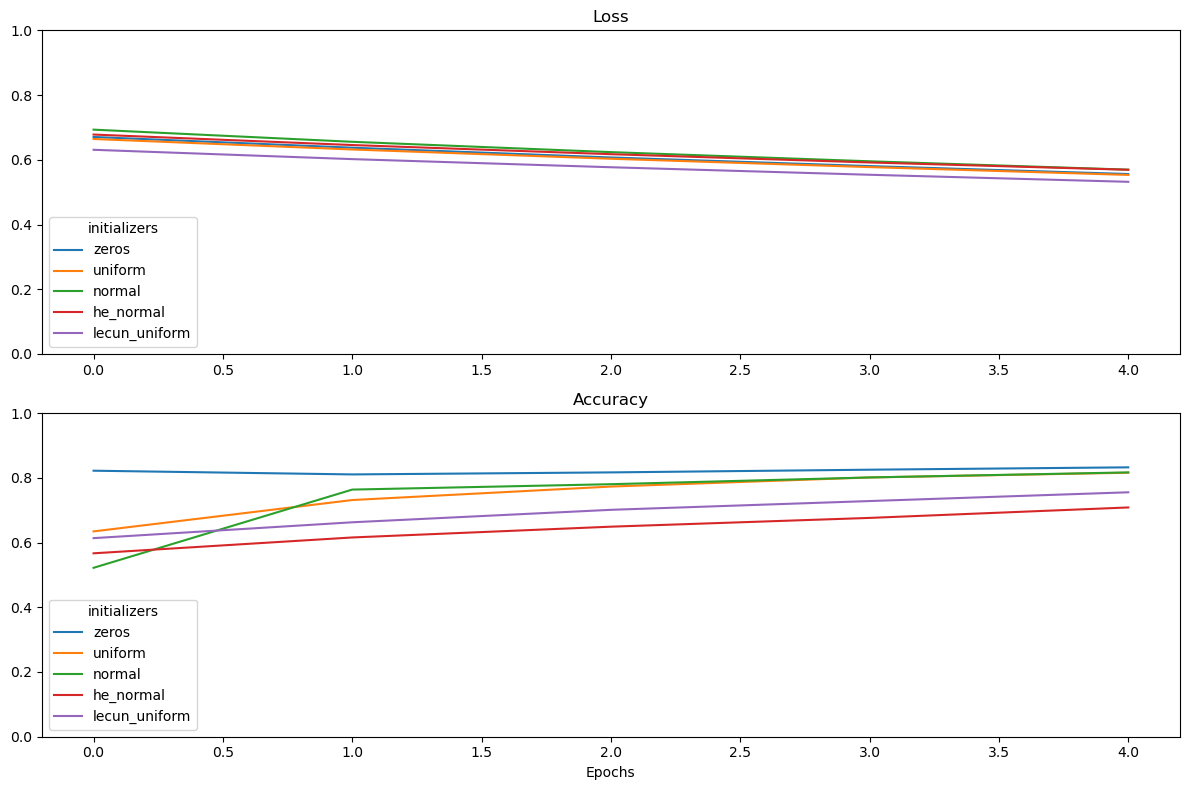

In [34]:
plt.figure(figsize=(12,8))

ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [35]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Epoch 1/20


D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6118 - loss: 0.7203 - val_accuracy: 0.8229 - val_loss: 0.5452
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.5053 - val_accuracy: 0.9375 - val_loss: 0.3844
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.3601 - val_accuracy: 0.9618 - val_loss: 0.2653
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.2619 - val_accuracy: 0.9688 - val_loss: 0.1879
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9700 - loss: 0.1818 - val_accuracy: 0.9826 - val_loss: 0.1378
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1481 - val_accuracy: 0.9826 - val_loss: 0.1043
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0989 - val_accuracy: 0.9826 - val_loss: 0.0822
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0896 - val_accuracy: 0.9861 - val_loss: 0.0660
Epo

In [36]:
result

[0.01213084813207388, 1.0]

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (116.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15 (64.00 B)

In [38]:
model.layers

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [39]:
inp = model.layers[0].input
out = model.layers[0].output

In [40]:
inp

<KerasTensor shape=(None, 4), dtype=float32, sparse=None, name=keras_tensor>

In [41]:
out

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_1>

In [50]:
features_function = K.function([inp], [out]) 

AttributeError: module 'tensorflow.keras.backend' has no attribute 'function'

In [52]:
import tensorflow as tf

@tf.function
def my_function(inputs):
    # Define your operations here
    outputs = inputs * 2  # Example operation
    return outputs

# Example usage
inputs = tf.constant([1.0, 2.0, 3.0])
result = my_function(inputs)
print(result)


tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32)


In [53]:
import tensorflow as tf
from tensorflow.keras import Model

# Assuming `inp` is your model's input and `out` is the output you're interested in

# Define the Model
features_model = Model(inputs=inp, outputs=out)

# Optionally, you can use tf.function to optimize it
@tf.function
def features_function(inputs):
    return features_model(inputs)

# Example usage
# Assuming you have some input data, e.g., `input_data`
input_data = tf.random.normal((1, 224, 224, 3))  # Example input

# Get the output
features = features_function(input_data)
print(features)


ValueError: in user code:

    File "C:\Users\Atiye\AppData\Local\Temp\ipykernel_17140\3438922939.py", line 12, in features_function  *
        return features_model(inputs)
    File "D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\input_spec.py", line 245, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "functional_7" is incompatible with the layer: expected shape=(None, 4), found shape=(1, 224, 224, 3)


In [ ]:
features_function

In [ ]:
features_function([X_test])[0].shape

In [ ]:
features = features_function([X_test])[0]

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

In [23]:
df = pd.read_csv('../data/wines.csv')

In [24]:
df.head()

Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280-OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [25]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [26]:
X = df.drop('Class', axis=1)
y = np.multiply( pd.get_dummies(df['Class'], prefix='Class') , 1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

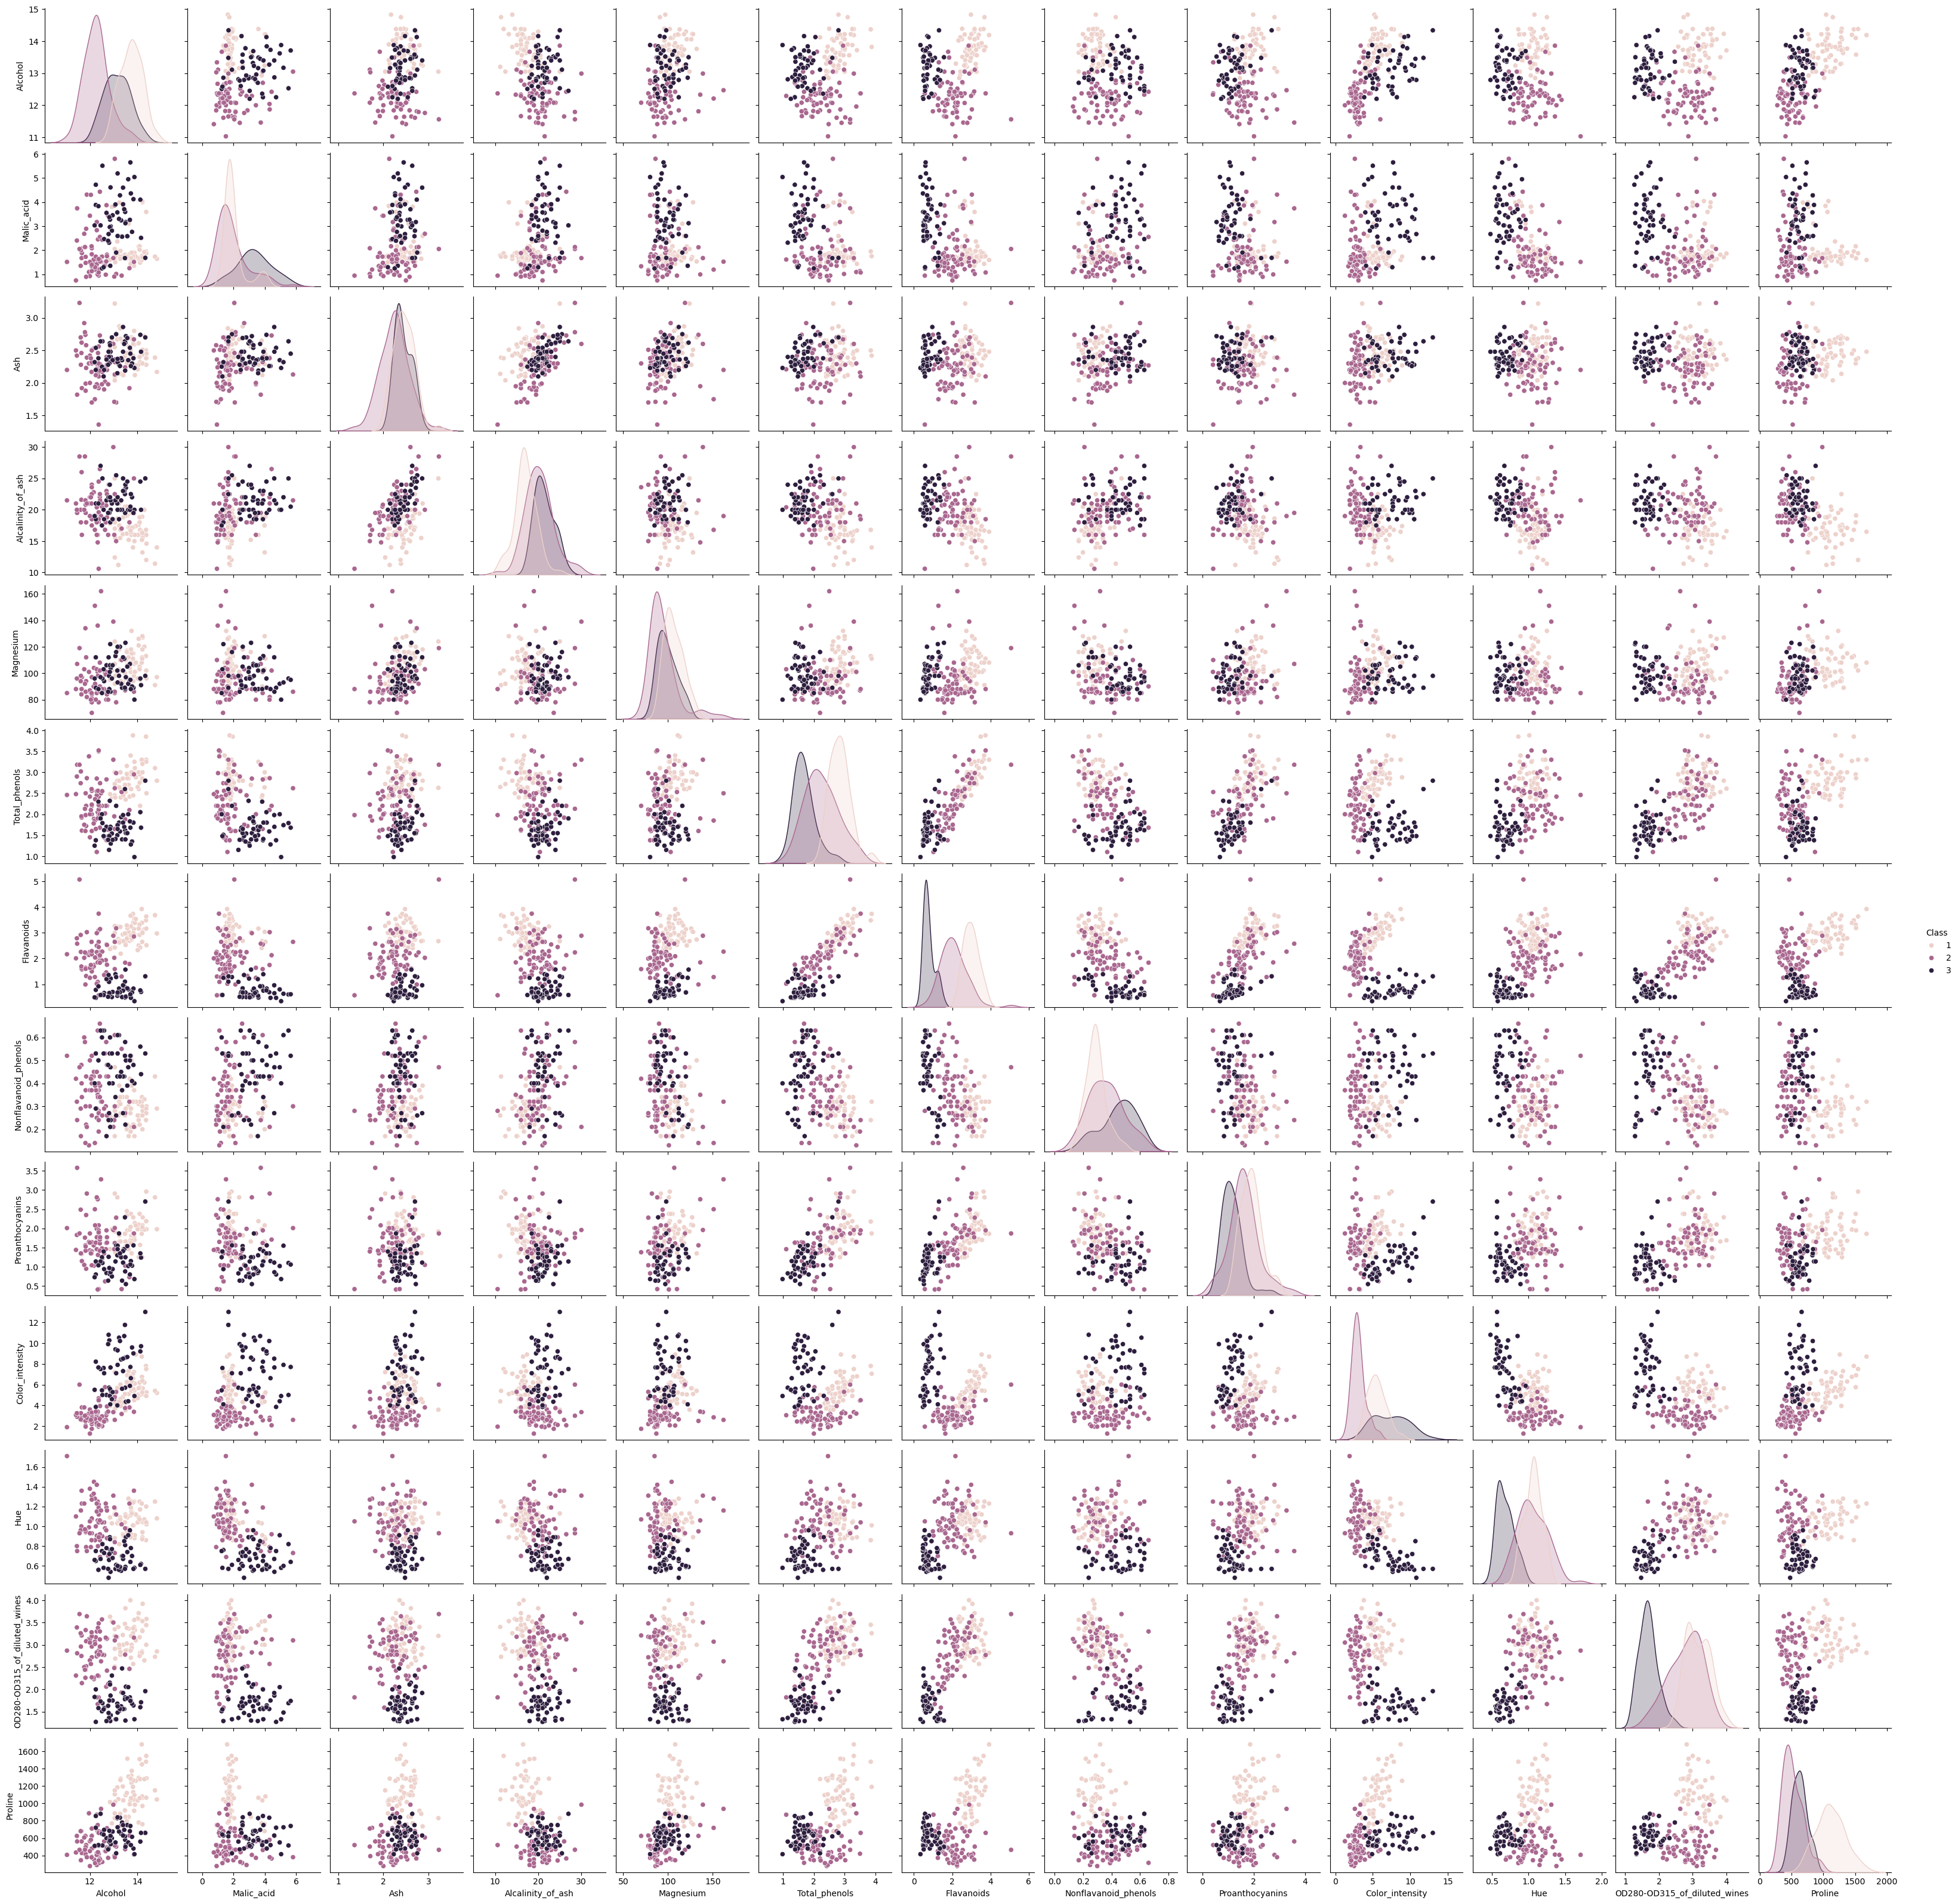

In [29]:
import seaborn as sns
sns.pairplot(df, hue="Class")

In [32]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow.keras.backend as K

In [33]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(13,) , activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.01),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10 , validation_split = 0.2 , batch_size = 8)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59 (236.00 B)

 Trainable params: 59 (236.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2459 - loss: 1.1437 - val_accuracy: 0.4400 - val_loss: 1.0821
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4582 - loss: 1.0783 - val_accuracy: 0.4400 - val_loss: 1.0665
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3783 - loss: 1.0749 - val_accuracy: 0.4400 - val_loss: 1.0520
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4196 - loss: 1.0544 - val_accuracy: 0.4400 - val_loss: 1.0397
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3336 - loss: 1.0498 - val_accuracy: 0.4400 - val_loss: 1.0248
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4037 - loss: 1.0188 - val_accuracy: 0.6400 - val_loss: 0.9978
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 0.9974 - val_accuracy: 0.6800 - val_loss: 0.9693
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6542 - loss: 0.9604 - val_accuracy: 0.6800 - val_loss

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


In [41]:
K.clear_session()

model = Sequential()
model.add(Dense(8, input_shape=(13,) , kernel_initializer = 'he_normal',activation='tanh'))
model.add(Dense(5, kernel_initializer = 'he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer = 'he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.05),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20 , validation_split = 0.2 , batch_size = 8)

Epoch 1/20


D:\Eyvazlou\anaconda3\envs\myML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3393 - loss: 1.1903 - val_accuracy: 0.4800 - val_loss: 0.9712
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4297 - loss: 1.0443 - val_accuracy: 0.4800 - val_loss: 0.8111
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6009 - loss: 0.8286 - val_accuracy: 0.3200 - val_loss: 1.4860
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4490 - loss: 0.9524 - val_accuracy: 0.4800 - val_loss: 1.3625
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5748 - loss: 1.0266 - val_accuracy: 0.5600 - val_loss: 0.9459
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6036 - loss: 0.8502 - val_accuracy: 0.9600 - val_loss: 0.3942
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8868 - loss: 0.4479 - val_accuracy: 0.9200 - val_loss: 0.3211
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9402 - loss: 0.2452 - val_accuracy: 1.0000 - val_loss: 0.1724
Ep

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 358 (1.40 KB)

 Trainable params: 178 (712.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 180 (724.00 B)

### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [44]:
from keras.layers import Input
from keras.models import Model

In [52]:
K.clear_session()
inputs = Input(shape = (13,))
x = Dense(8,kernel_initializer = 'he_normal', activation = 'tanh')(inputs)
x = Dense(5,kernel_initializer = 'he_normal', activation = 'tanh')(x)
second_to_last = Dense(2 , kernel_initializer = 'he_normal' , activation = 'tanh')(x)
outputs = Dense(3 , activation = 'softmax')(second_to_last)

model = Model(inputs = inputs , outputs = outputs) 
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.05),
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20 , validation_split = 0.2 , batch_size = 16)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4837 - loss: 1.1091 - val_accuracy: 0.7200 - val_loss: 0.9455
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7008 - loss: 0.7415 - val_accuracy: 0.7600 - val_loss: 0.5430
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8542 - loss: 0.4338 - val_accuracy: 0.8400 - val_loss: 0.4491
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9325 - loss: 0.2360 - val_accuracy: 0.8000 - val_loss: 0.5901
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8593 - loss: 0.4677 - val_accuracy: 0.8400 - val_loss: 0.3943
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8683 - loss: 0.2901 - val_accuracy: 0.9600 - val_loss: 0.1907
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9448 - loss: 0.1363 - val_accuracy: 1.0000 - val_loss: 0.0974
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9623 - loss: 0.1493 - val_accuracy: 1.0000 - val_loss: 0.0920
Epoch 

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard

In [53]:
from keras.callbacks import ModelCheckpoint , EarlyStopping, TensorBoard

In [ ]:
checkpointer = ModelCheckpoint(filepath = "